# Impute missing data using linear and spline interpolation

This notebook shows how we can use the linear and spline interpolation methods to fill missing data for a time series.

We will work with a monthly retail sales dataset (found [here](https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv)).

For instructions on how to download, prepare, and store the dataset, refer to notebook number 1, in the folder "01-Create-Datasets" from this repo.

## Data Set Synopsis

The timeseries is between January 1992 and Apr 2005.

It consists of a single series of monthly values representing sales volumes. 

In [1]:
import pandas as pd
import seaborn as sns

sns.set_context("talk")

# Load dataset

In [4]:
df = pd.read_csv(
    "../Datasets/example_retail_sales_with_missing_data.csv",
    parse_dates=["ds"],
    index_col=["ds"],
) 

In [5]:
df.head()

,y
ds,
1992-01-01,146376.0
1992-02-01,147079.0
1992-03-01,159336.0
1992-04-01,163669.0
1992-05-01,170068.0


# Check for missing data

We check for missing data in the target and quantify how many missing values there are.

In [4]:
n_missing = df["y"].isnull().sum()

print(f"Number of datapoints missing: {n_missing}")
print(f"Proportion of dataset missing: {n_missing/len(df):.2%}")

Number of datapoints missing: 33
Proportion of dataset missing: 20.62%


We plot the time series to see where the data is missing.

Text(0.5, 0, 'Time')

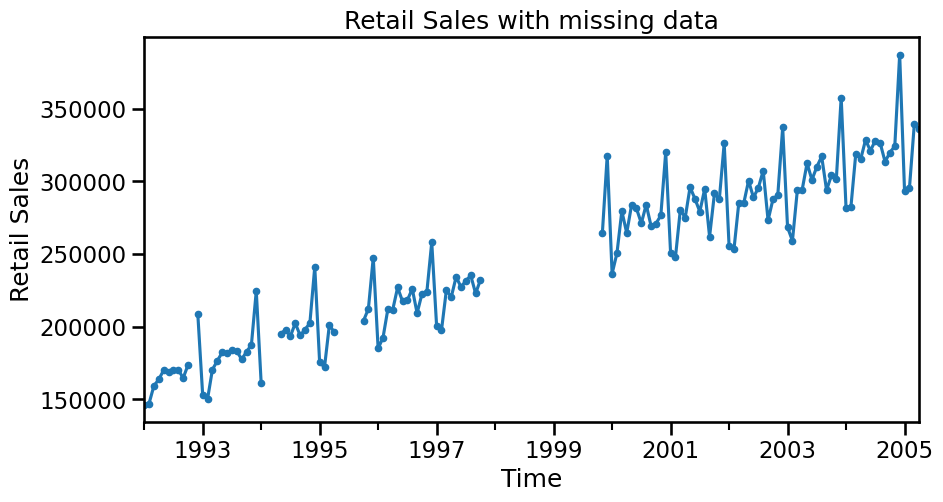

In [6]:
ax = df.plot(marker=".", figsize=[10, 5], legend=None)
ax.set_title("Retail Sales with missing data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

# Linear interpolation

Text(0.5, 0, 'Time')

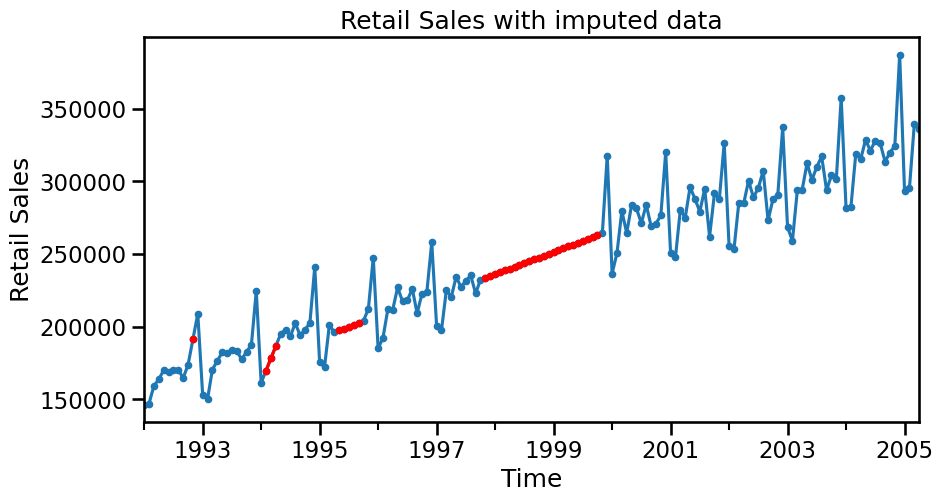

In [7]:
# Apply the linear interpolation method
# Note: If the time intervals between rows are not uniform then
# the method should be set as 'time' to achieve a linear fit.
df_imputed = df.interpolate(method="linear")

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], legend=None)
df_imputed[df.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with imputed data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

Text(0.5, 0, 'Time')

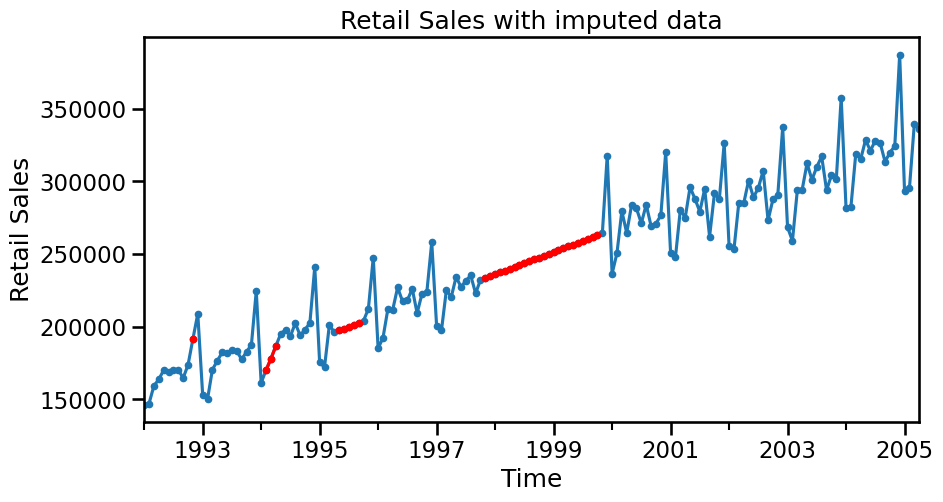

In [8]:
# Apply the linear interpolation method
# Note: If the time intervals between rows are not uniform then
# the method should be set as 'time' to achieve a linear fit.
df_imputed = df.interpolate(method="time")

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5], legend=None)
df_imputed[df.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with imputed data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

We can see here that linear interpolation is reasonable for small gaps but also captures the trend for larger gaps, however, the seasonality is lost.

# Spline interpolation

Typically the order parameter is relatively low when using splines, 3 is common. This is because higher order splines will begin fitting more complex or larger magnitude curves between missing values.

Note: Splines are generally preferred to polynomial interpolation. This is because splines are less sensitive than a polynomial fit to small changes to the data points that they are fitting.

Text(0.5, 0, 'Time')

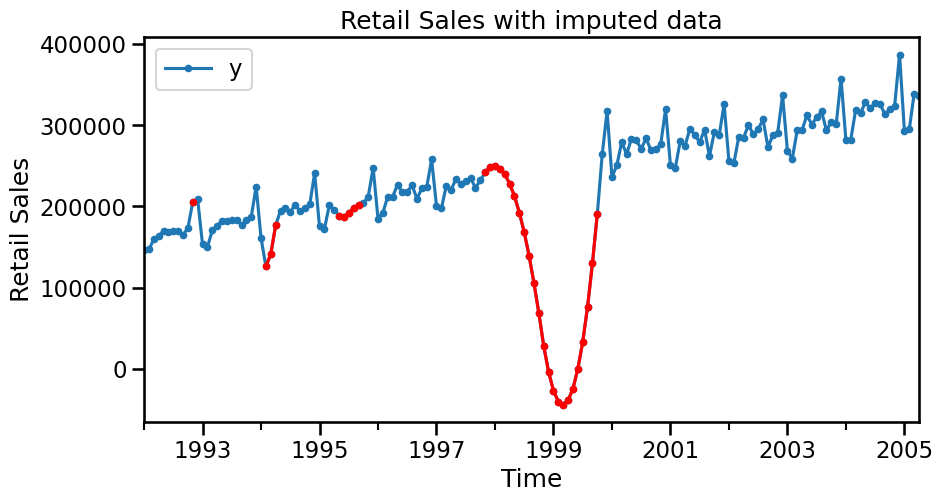

In [15]:
# Apply the spline interpolation method
df_imputed = df.interpolate(method="spline", order=2)

# Plot the imputed time series
ax = df_imputed.plot(linestyle="-", marker=".", figsize=[10, 5])
df_imputed[df.isnull()].plot(ax=ax, legend=None, marker=".", color="r")

ax.set_title("Retail Sales with imputed data")
ax.set_ylabel("Retail Sales")
ax.set_xlabel("Time")

We can see that cubic splines are not appropriate when there are large gaps in the data.